In [1]:
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.iloc[:,5]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Not much outliers are there

In [7]:
#Get a count of the number of survivors  
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

IndexError: list index out of range

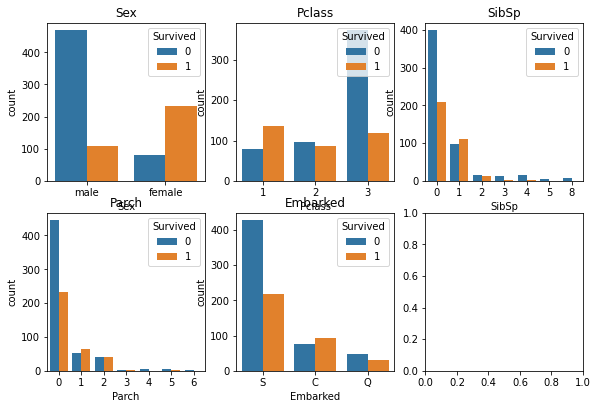

In [9]:
# Visualize the count of survivors for columns 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
cols = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        sns.countplot(df[cols[i]], hue=df["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout


In [10]:
#Look at survival rate by sex
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
#Look at survival rate by sex and class
df.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


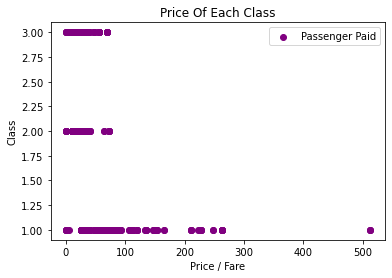

In [12]:
#Plot the Prices Paid Of Each Class
plt.scatter(df['Fare'], df['Pclass'],  color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

In [13]:
#Look at all of the values in each column & get a count 
for val in df:
    print(df[val].value_counts())
    print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Moussa, Mrs. (Mantoura Boulos)       1
Sage, Miss. Constance Gladys         1
Andersson, Miss. Ellis Anna Maria    1
Dennis, Mr. Samuel                   1
Cann, Mr. Ernest Charles             1
                                    ..
Marvin, Mr. Daniel Warner            1
Drazenoic, Mr. Jozef                 1
de Pelsmaeker, Mr. Alfons            1
Lewy, Mr. Ervin G                    1
Johnson, Mr. Alfred                  1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5

In [14]:
#Count the empty (NaN, NAN, na) values in each column 
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#Remove the rows with missing values
df = df.dropna(subset =['Embarked', 'Age'])

In [16]:
df.shape

(712, 12)

In [17]:
# Drop the columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [18]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [19]:
#Print the unique values in the columns
print(df['Sex'].unique())
print(df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [20]:
#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
df.iloc[:,2]= labelencoder.fit_transform(df.iloc[:,2].values)
#print(labelencoder.fit_transform(titanic.iloc[:,2].values))

#Encode embarked
df.iloc[:,7]= labelencoder.fit_transform(df.iloc[:,7].values)
#print(labelencoder.fit_transform(titanic.iloc[:,7].values))

#Print the NEW unique values in the columns
print(df['Sex'].unique())
print(df['Embarked'].unique())


[1 0]
[2 0 1]


In [21]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 1:8].values 
Y = df.iloc[:, 0].values 

In [22]:
# Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [23]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
    
    from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression()

NameError: name 'LogisticRegression' is not defined

In [26]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)
  
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
return  knn, svc_lin, svc_rbf, gauss, tree, forest


[1]K Nearest Neighbor Training Accuracy: 0.8664323374340949
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7768014059753954
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8506151142355008
[4]Gaussian Naive Bayes Training Accuracy: 0.8031634446397188
[5]Decision Tree Classifier Training Accuracy: 0.9929701230228472
[6]Random Forest Classifier Training Accuracy: 0.9753954305799648


SyntaxError: 'return' outside function (<ipython-input-26-40ca4951da27>, line 39)

In [27]:
#Get and train all of the models
model = models(X_train,Y_train)


Decision tree classifier Has the better accuracy

In [28]:
import pickle 
filename = 'project1.pkl'
pickle.dump(tree,open(filename, 'wb'))

In [30]:
import numpy as np
a=np.array(Y_test)
predicted=np.array(tree.predict(X_test))
df_com = pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,0,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
138,0,0
139,0,1
140,0,0
141,0,0
